In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import pandas as pd
from time import time
import numpy as np
import re
import requests

import datetime as dt
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
os.getcwd()

import my_package.graph_functions as gf
from my_package.graph_options import graph_options, graph_options_alt_1, graph_options_alt_2, graph_options_alt_3, graph_options_alt_4
import my_package.dicts as dc
import my_package.datepaths as dp
import my_package.calculus as cc

from keys import keys
import twitter

# Download raw data

In [5]:
os.chdir('/home/edmz/DisplayDataCovid/Code')

In [6]:
tic = time()
address = 'https://www.data.gouv.fr/api/1/datasets/'
datasets = ['donnees-hospitalieres-relatives-a-lepidemie-de-covid-19',
            'donnees-relatives-aux-resultats-des-tests-virologiques-covid-19',
            'donnees-relatives-aux-personnes-vaccinees-contre-la-covid-19-1',
           ]
pattern = re.compile('sp-pos-quot-dep*|vacsi-a-dep*|donnees-hospitalieres-covid19*|donnees-hospitalieres-classe-age-covid19*')

for dataset in datasets:
    response = requests.get(address + dataset)
    for resource in response.json()['resources']:
        if (pattern.match(resource['title'])) and (resource['title'] not in os.listdir('../Data/')):
            r = requests.get(resource['url'], allow_redirects=True)
            with open('../Data/' + resource['title'], 'wb') as file:
                file.write(r.content)
            print(resource['url'])
            
toc = time()
time_download = -tic + toc
time_download

0.9125065803527832

# Calcul

In [7]:
tic = time()

In [3]:
# Donn√©es relatives aux r√©sultats des tests virologiques
d_tests_1, path_temp = cc.sp_input()
d_tests_2 = cc.sp_tot_3C(d_tests_1)
d_tests_3 = cc.sp_compute(d_tests_2)

# dout = d_tests_3
# fname = path_temp + '-tot-3C-compute.csv'
# dout.to_csv(fname, sep = ';', index = False)
# print(fname)

../Data/sp-pos-quot-dep-2021-07-19-19h05.csv


In [4]:
# Donn√©es hospitali√®res
d_hosp_1, path_temp = cc.hosp_input()
d_hosp_2 = cc.hosp_3C(d_hosp_1, keepDROM = True)
d_hosp_3 = cc.hosp_compute(d_hosp_2)

# dout = d_hosp_3
# fname = path_temp + '-3C-compute.csv'
# dout.to_csv(fname, sep = ';', index = False)
# print(fname)

../Data/donnees-hospitalieres-classe-age-covid19-2021-07-19-19h09.csv


In [5]:
d_hosp_1, path_temp = cc.hosp_input()
d_hosp_2 = cc.hosp_3C(d_hosp_1, True)
d_hosp_3_DROM = cc.hosp_compute(d_hosp_2)

# dout = d_hosp_3
# fname = path_temp + '-3C-compute-DROM.csv'
# dout.to_csv(fname, sep = ';', index = False)
# print(fname)

../Data/donnees-hospitalieres-classe-age-covid19-2021-07-19-19h09.csv


In [6]:
# Donn√©es hospitali√®res d√©partementales (pas de r√©partition par classe d'√¢ge)
d_hosp_dep_1, path_temp = cc.hosp_dep_input()
d_hosp_dep_2 = cc.hosp_dep_compute(d_hosp_dep_1)

# dout = d_hosp_dep_2
# fname = path_temp + '-compute.csv'
# dout.to_csv(fname, sep = ';', index = False)
# print(fname)

../Data/donnees-hospitalieres-covid19-2021-07-19-19h09.csv


In [7]:
# Donn√©es relatives aux personnes vaccin√©es (VACSI) 
d_vac_1, path_temp = cc.vac_input()
d_vac_1 = d_vac_1[(d_vac_1.dep != '20') & (d_vac_1.dep != '98') & (d_vac_1.dep != '947') & (d_vac_1.dep != '99')& (d_vac_1.dep != '00')]
d_vac_2 = cc.vac_tot_3C(d_vac_1)
d_vac_3 = cc.vac_compute(d_vac_2)

# dout = d_vac_3
# fname = path_temp + '-tot-3C-compute.csv'
# dout.to_csv(fname, sep = ';', index = False)
# print(fname)

../Data/vacsi-a-dep-2021-07-16-19h05.csv


In [8]:
toc = time()
time_calculus = -tic+toc

NameError: name 'tic' is not defined

# Trac√© des figures

In [9]:
tic = time()

In [10]:
# fname = dp.retrieve_temp('sp-pos-quot-dep', 'tot-3C-compute')
# dtes = pd.read_csv(fname, sep = ';', 
#                 parse_dates = ['jour'],
#                 dtype = {'entity': str},
#                )
dtes = d_tests_3

# fname = dp.retrieve_temp('vacsi-a-dep', 'tot-3C-compute')
# dvac = pd.read_csv(fname, sep = ';', 
#                 parse_dates = ['jour'],
#                 dtype = {'entity': str},
#                )
dvac = d_vac_3

# fname = dp.retrieve_temp('donnees-hospitalieres-classe-age-covid19', '3C-compute')
# dhos = pd.read_csv(fname, sep = ';', 
#                 parse_dates = ['jour'],
#                 dtype = {'entity': str},
#                )
dhos = d_hosp_3

# fname = dp.retrieve_temp('donnees-hospitalieres-covid19', 'compute')
# dhosdep = pd.read_csv(fname, sep = ';', 
#                 parse_dates = ['jour'],
#                 dtype = {'entity': str},
#                )
dhosdep = d_hosp_dep_2
dhosdep['three_class'] = 'whole'

d = pd.merge(dhos, dhosdep, how = 'outer')
d = pd.merge(d, dvac, how = 'outer')
d = pd.merge(d, dtes, how = 'outer')
d = d.sort_values(['entity', 'three_class', 'jour'])

In [11]:
d.sample(5)

entity three_class       jour  hosp   rea     dc  \
6551    Centre-Val de Loire       whole 2020-09-04  56.0   9.0  575.0   
86884                    01       30-59 2021-04-16   NaN   NaN    NaN   
80036                    87       whole 2021-02-10  82.0  13.0  217.0   
178481                   45         60+ 2020-06-18   NaN   NaN    NaN   
106614                   33        0-29 2021-02-19   NaN   NaN    NaN   

        dc hebdo  taux hosp  taux rea  taux d√©c√®s  ...  taux dose 1  \
6551         1.0   2.188292  0.351690    0.039077  ...          NaN   
86884        NaN        NaN       NaN         NaN  ...     8.211441   
80036        9.0  22.115898  3.506179    2.427355  ...     3.882958   
178481       NaN        NaN       NaN         NaN  ...          NaN   
106614       NaN        NaN       NaN         NaN  ...     0.182905   

        taux complet      P       T        pop  P hebdo  T hebdo  \
6551             NaN  240.0  7432.0  2559073.0   1095.0  36227.0   
86884       2.072762  151.0  1562.0   265057.0    996.0   8826.0   
80036       1.244424   68.0  1275.0   370774.0    469.0  10188.0   
178481           NaN    1.0   164.0   180580.0     10.0   1134.0   
106614      0.070045  157.0  2403.0   583909.0    694.0  12291.0   

        incidence hebdo  taux de positifs hebdo  taux de tests hebdo  
6551          42.788932                3.022607          1415.629800  
86884        375.768231               11.284840          3329.849806  
80036        126.492149                4.603455          2747.765485  
178481         5.537712                0.881834           627.976520  
106614       118.854137                5.646408          2104.951285  

[5 rows x 30 columns]

In [12]:
regions = dc.regions
regions_metro = dc.regions_metro
regions_outre_mer = dc.regions_outre_mer

In [13]:
plt.rcParams["figure.facecolor"] = (1,1,1,1)

## Figures Type 1

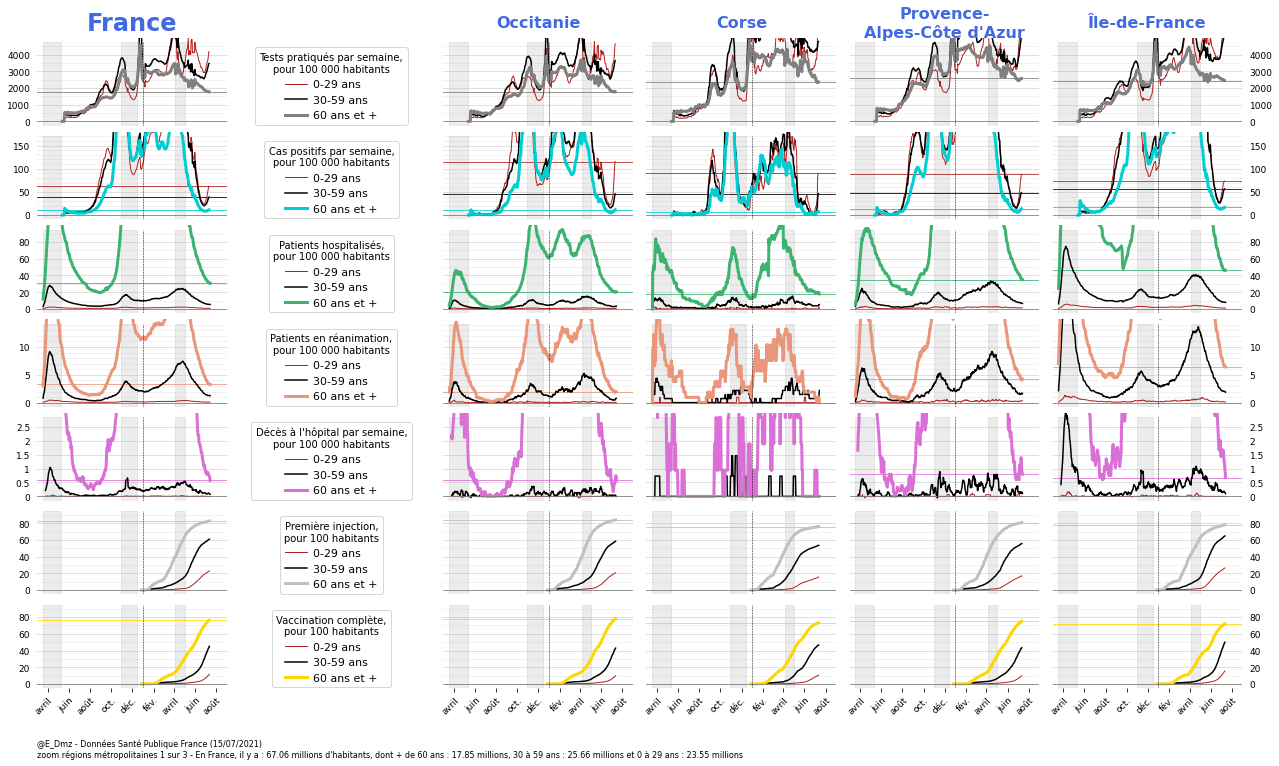

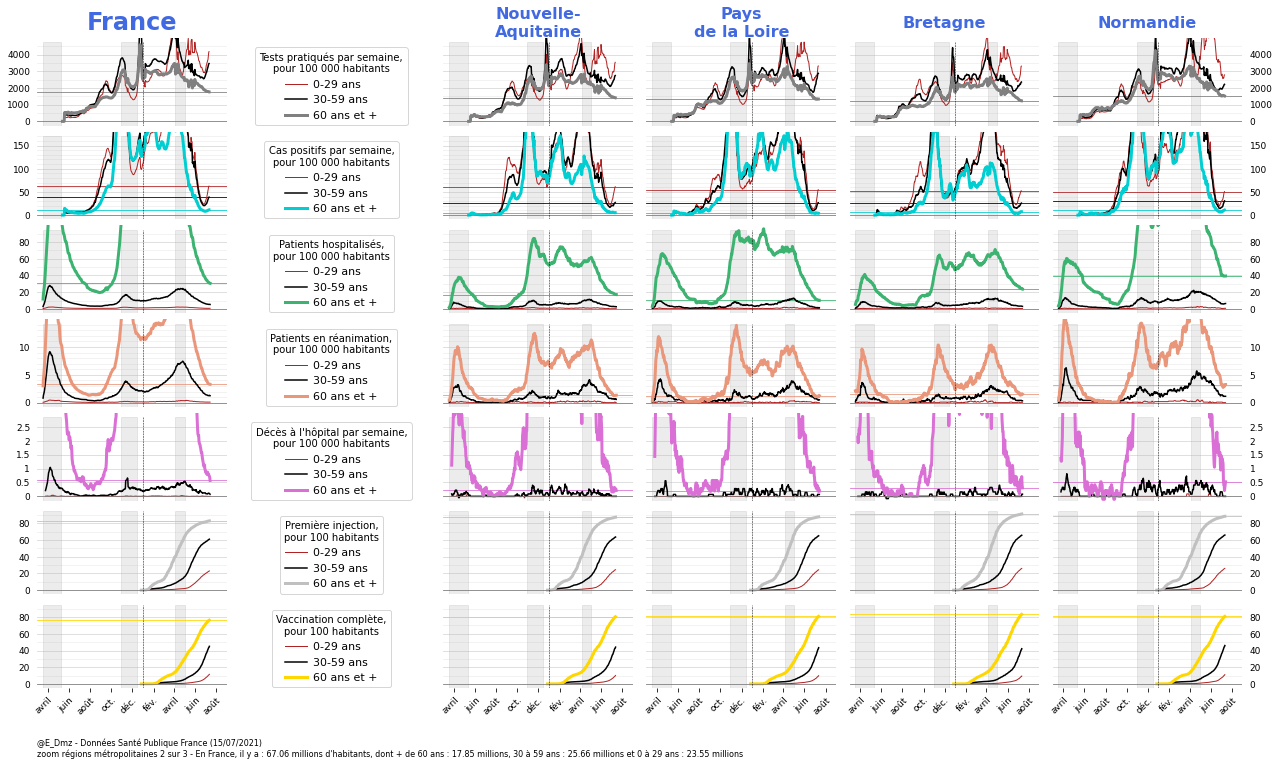

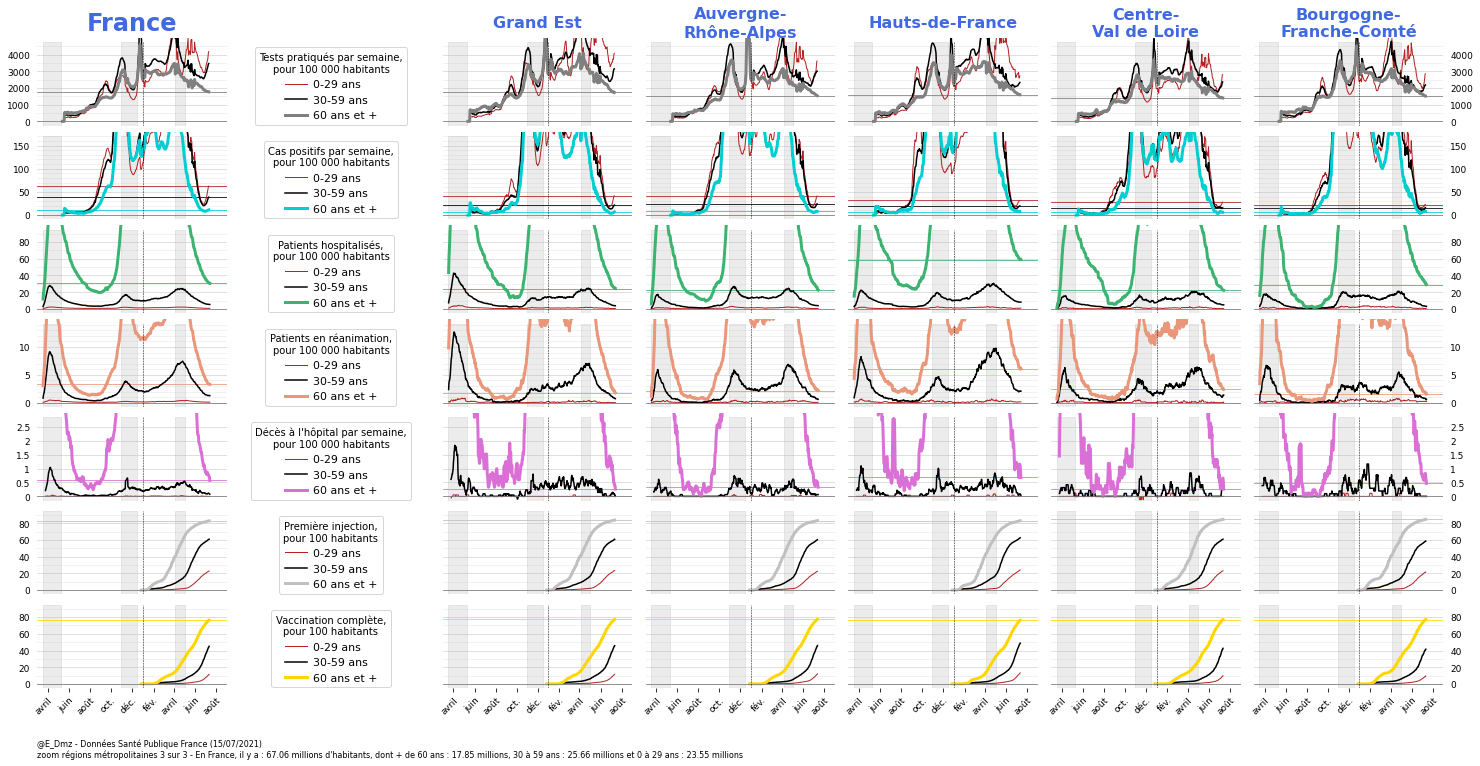

In [44]:
# jour = d[d['taux rea'].notna()].jour.max()
# regions_ordered = (d[(d.jour == jour) 
#                     & (d.entity.isin(regions))
#                     & (d.three_class == '60+')]
#                    .groupby('entity')['taux rea']
#                    .mean()
#                    .sort_values(ascending = False)
#                    .index
#                    .tolist())
# regions_ordered_metro = (d[(d.jour == jour) 
#                     & (d.entity.isin(regions_metro))
#                     & (d.three_class == '60+')]
#                    .groupby('entity')['taux rea']
#                    .mean()
#                    .sort_values(ascending = False)
#                    .index
#                    .tolist())
# regions_ordered_outre_mer = (d[(d.jour == jour) 
#                     & (d.entity.isin(regions_outre_mer))
#                     & (d.three_class == '60+')]
#                    .groupby('entity')['taux rea']
#                    .mean()
#                    .sort_values(ascending = False)
#                    .index
#                    .tolist())
jour = d[d['incidence hebdo'].notna()].jour.max()
regions_ordered = (d[(d.jour == jour) 
                    & (d.entity.isin(regions))
                    & (d.three_class == '0-29')]
                   .groupby('entity')['incidence hebdo']
                   .mean()
                   .sort_values(ascending = False)
                   .index
                   .tolist())
regions_ordered_metro = (d[(d.jour == jour) 
                    & (d.entity.isin(regions_metro))
                    & (d.three_class == '0-29')]
                   .groupby('entity')['incidence hebdo']
                   .mean()
                   .sort_values(ascending = False)
                   .index
                   .tolist())
regions_ordered_outre_mer = (d[(d.jour == jour) 
                    & (d.entity.isin(regions_outre_mer))
                    & (d.three_class == '0-29')]
                   .groupby('entity')['incidence hebdo']
                   .mean()
                   .sort_values(ascending = False)
                   .index
                   .tolist())
# regions_ordered = (d[(d.entity.isin(regions)) 
#                      & (d.three_class == 'whole')]
#                    .groupby('entity')['taux d√©c√®s']
#                    .sum()
#                    .sort_values(ascending = False)
#                    .index.tolist())
gf.fig_type1(d, regions_ordered_metro[:4], 'r√©gions m√©tropolitaines 1 sur 3')
gf.fig_type1(d, regions_ordered_metro[4:8], 'r√©gions m√©tropolitaines 2 sur 3')
gf.fig_type1(d, regions_ordered_metro[8:], 'r√©gions m√©tropolitaines 3 sur 3')
# gf.fig_type1(d, regions_ordered_metro, 'toutes r√©gions m√©tropolitaines')

# gf.fig_type1(d, regions_ordered[:5], 'r√©gions 1 sur 3')
# gf.fig_type1(d, regions_ordered[5:10], 'r√©gions 2 sur 3')
# gf.fig_type1(d, regions_ordered[10:], 'r√©gions 3 sur 3')
# gf.fig_type1(d, regions_ordered, 'toutes r√©gions')

gf.fig_type1(d, regions_ordered_metro[:4], 'zoom r√©gions m√©tropolitaines 1 sur 3', graph_options = graph_options_alt_4)
gf.fig_type1(d, regions_ordered_metro[4:8], 'zoom r√©gions m√©tropolitaines 2 sur 3', graph_options = graph_options_alt_4)
gf.fig_type1(d, regions_ordered_metro[8:], 'zoom r√©gions m√©tropolitaines 3 sur 3', graph_options = graph_options_alt_4)
# gf.fig_type1(d, regions_ordered_metro, 'zoom toutes r√©gions m√©tropolitaines', graph_options = graph_options_alt_1)

gf.fig_type1(d, regions_ordered_outre_mer, 'r√©gions d\'Outre-mer')
gf.fig_type1(d, regions_ordered_outre_mer, 'zoom r√©gions d\'Outre-mer', graph_options = graph_options_alt_2)

# gf.fig_type1(d, regions_ordered_outre_mer, 'r√©gions d\'Outre-mer (Mayotte)', graph_options = graph_options_alt_3)



# Figures Type 0

## France

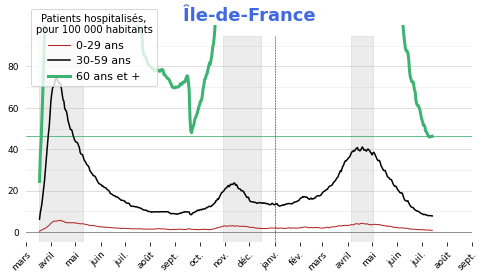

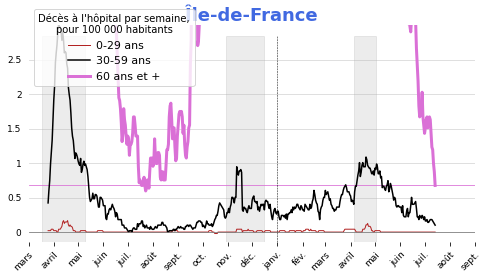

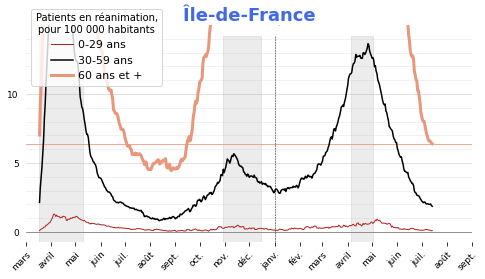

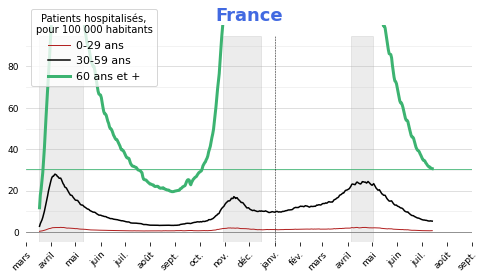

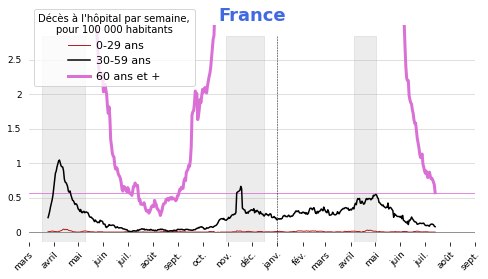

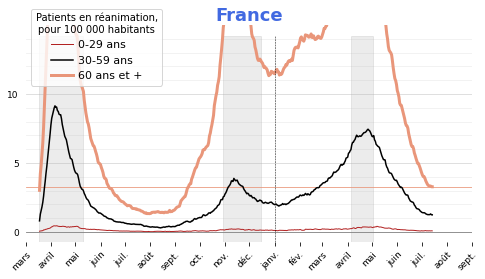

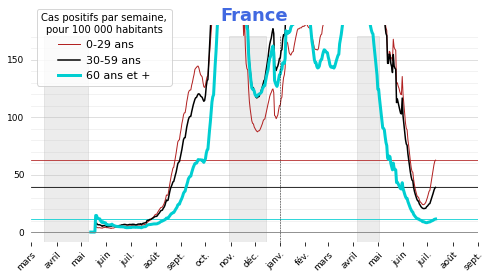

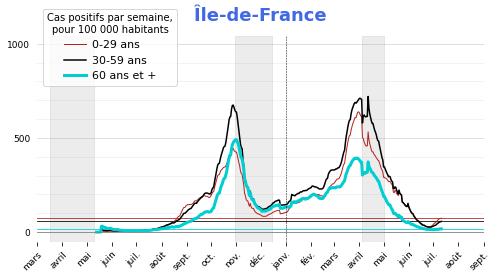

In [23]:
gf.simple_figure(d, 'France', 'taux hosp', graph_options = graph_options_alt_4)
gf.simple_figure(d, 'France', 'taux d√©c√®s', graph_options = graph_options_alt_4)
gf.simple_figure(d, 'France', 'taux rea', graph_options = graph_options_alt_4)
gf.simple_figure(d, 'France', 'incidence hebdo', graph_options = graph_options_alt_4)


## √éle-de-France

In [ ]:
gf.simple_figure(d, '√éle-de-France', 'taux hosp', graph_options = graph_options_alt_4)
gf.simple_figure(d, '√éle-de-France', 'taux d√©c√®s', graph_options = graph_options_alt_4)
gf.simple_figure(d, '√éle-de-France', 'taux rea', graph_options = graph_options_alt_4)
gf.simple_figure(d, '√éle-de-France', 'incidence hebdo', graph_options = graph_options_alt_4)


## Paris et petite couronne

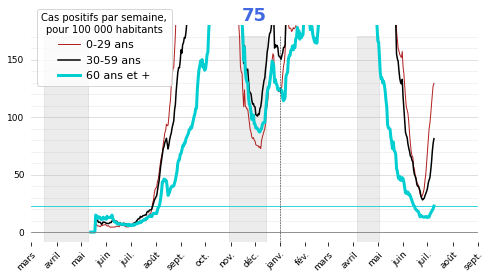

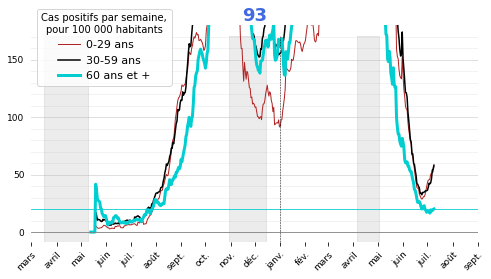

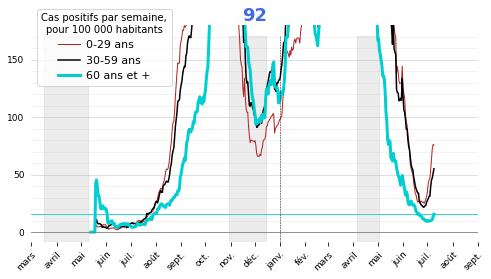

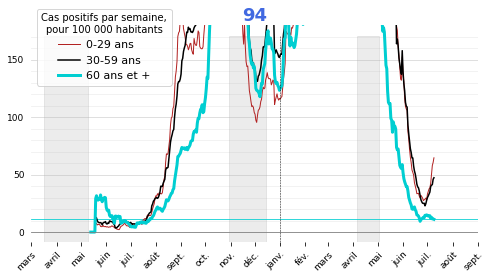

In [17]:
gf.simple_figure(d, '75', 'incidence hebdo', graph_options = graph_options_alt_4)
gf.simple_figure(d, '93', 'incidence hebdo', graph_options = graph_options_alt_4)
gf.simple_figure(d, '92', 'incidence hebdo', graph_options = graph_options_alt_4)
gf.simple_figure(d, '94', 'incidence hebdo', graph_options = graph_options_alt_4)

## Grande couronne

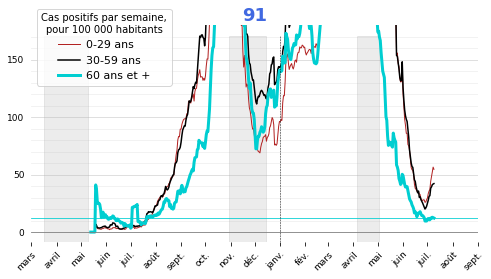

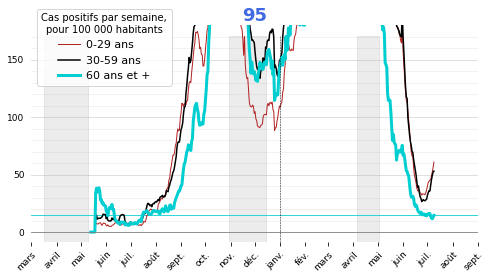

In [18]:
gf.simple_figure(d, '91', 'incidence hebdo', graph_options = graph_options_alt_4)
gf.simple_figure(d, '95', 'incidence hebdo', graph_options = graph_options_alt_4)
gf.simple_figure(d, '77', 'incidence hebdo', graph_options = graph_options_alt_4)
gf.simple_figure(d, '78', 'incidence hebdo', graph_options = graph_options_alt_4)

## Martinique et Guyane

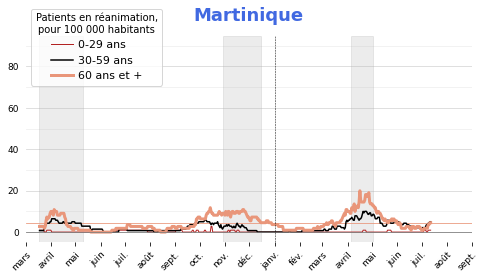

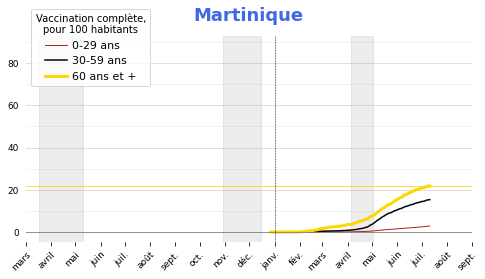

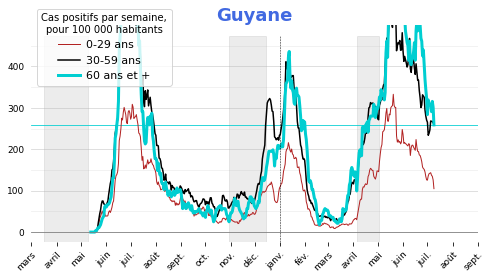

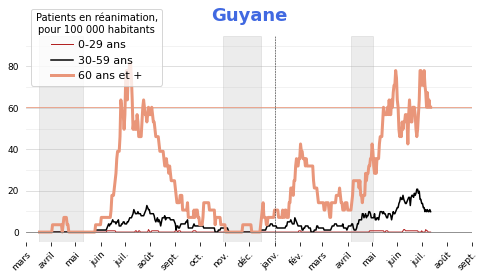

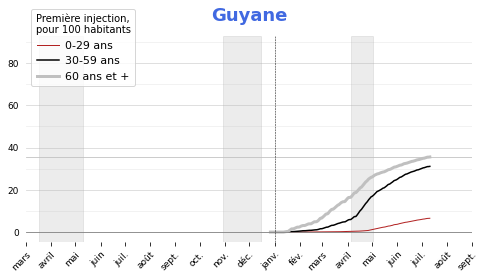

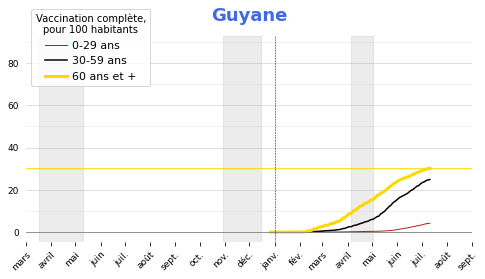

In [20]:
gf.simple_figure(d, 'Martinique', 'incidence hebdo', graph_options = graph_options_alt_2)
gf.simple_figure(d, 'Martinique', 'taux rea', graph_options = graph_options_alt_2)
gf.simple_figure(d, 'Martinique', 'taux dose 1', graph_options = graph_options_alt_2)
gf.simple_figure(d, 'Martinique', 'taux complet', graph_options = graph_options_alt_2)
gf.simple_figure(d, 'Guyane', 'incidence hebdo', graph_options = graph_options_alt_2)
gf.simple_figure(d, 'Guyane', 'taux rea', graph_options = graph_options_alt_2)
gf.simple_figure(d, 'Guyane', 'taux dose 1', graph_options = graph_options_alt_2)
gf.simple_figure(d, 'Guyane', 'taux complet', graph_options = graph_options_alt_2)
toc = time()
time_graph = -tic + toc

## Corse

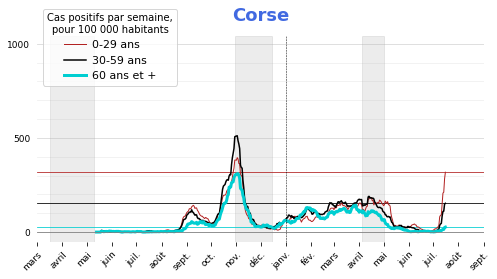

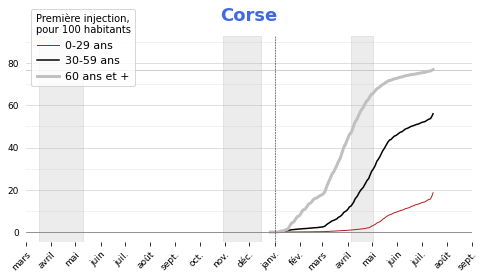

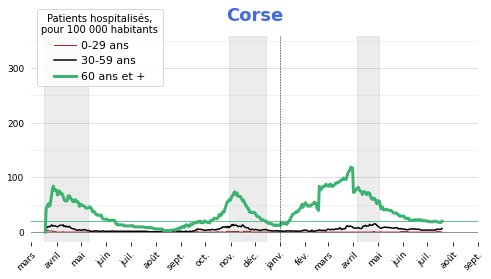

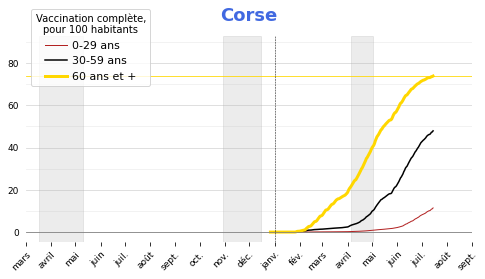

In [16]:
gf.simple_figure(d, 'Corse', 'incidence hebdo')
gf.simple_figure(d, 'Corse', 'taux dose 1')
gf.simple_figure(d, 'Corse', 'taux hosp')
gf.simple_figure(d, 'Corse', 'taux complet')
gf.simple_figure(d, 'Corse', 'taux rea')

# Tweet

In [24]:
tic = time()
now = dt.datetime.now()
now_text = now.strftime("%d/%m %H:%M")
api = twitter.Api(**keys)
num_tweets = 9

#Tweet 1
path_to_type0 = '/home/edmz/DisplayDataCovid/Output/Type0/'
figures = ['√éle-de-France-incidence.png',
'√éle-de-France-hosp.png',
'√éle-de-France-rea.png',
'√éle-de-France-deces.png']
status = api.PostUpdate(f'[ü§ñ MAJ {now_text}]\nIncidence et donn√©es hospitali√®res en √éle-de-France ‚§µÔ∏è\n@SantePubliqueFr @datagouvfr\n1/{num_tweets}', 
                        media = [path_to_type0 + figure for figure in figures],
                                 )
status_0 = status

#Tweet 2
figures = ['France-incidence.png',
'France-hosp.png',
'France-rea.png',
'France-deces.png']
status = api.PostUpdate(f'Incidence et donn√©es hospitali√®res en France ‚§µÔ∏è\nü§ñ 2/{num_tweets}', 
                        media = [path_to_type0 + figure for figure in figures],
                       in_reply_to_status_id = status.id,
                                 )
#Tweet 3
figures = ['75-incidence.png',
'92-incidence.png',
'93-incidence.png',
'94-incidence.png']
status = api.PostUpdate(f'Incidence √† Paris et dans les 3 d√©partements de petite couronne ‚§µÔ∏è\nü§ñ 3/{num_tweets}', 
                        media = [path_to_type0 + figure for figure in figures],
                       in_reply_to_status_id = status.id,
                                 )

#Tweet 4
figures = ['91-incidence.png',
'95-incidence.png',
'77-incidence.png',
'78-incidence.png']
status = api.PostUpdate(f'Incidence dans les 4 d√©partements de grande couronne ‚§µÔ∏è\nü§ñ 4/{num_tweets}', 
                        media = [path_to_type0 + figure for figure in figures],
                       in_reply_to_status_id = status.id,
                                 )
#Tweet 5
path_to_type1 = '/home/edmz/DisplayDataCovid/Output/Type1/'
'France-hosp.png'
figures = ['r√©gions m√©tropolitaines 1 sur 3.png',
'r√©gions m√©tropolitaines 2 sur 3.png',
'r√©gions m√©tropolitaines 3 sur 3.png',
"r√©gions d'Outre-mer.png"]
status = api.PostUpdate(f'Comparaison de 7Ô∏è‚É£ indicateurs,\npour 3Ô∏è‚É£ classes d\'√¢ge (0-29, 30-59 et 60+), r√©gion par r√©gion ‚§µÔ∏è\n(attention : √©chelles diff√©rentes en m√©tropole et dans les outre-mer)\n@SantePubliqueFr @datagouvfr\nü§ñ 5/{num_tweets}', 
                        media = [path_to_type1 + figure for figure in figures],
                       in_reply_to_status_id = status.id,
                                 )
#Tweet 6
figures = ['zoom r√©gions m√©tropolitaines 1 sur 3.png',
'zoom r√©gions m√©tropolitaines 2 sur 3.png',
'zoom r√©gions m√©tropolitaines 3 sur 3.png',
"zoom r√©gions d'Outre-mer.png"]
status = api.PostUpdate(f'Voici les m√™mes figures, en zoomant ‚§µÔ∏è\n(attention : √©chelles diff√©rentes en m√©tropole et dans les outre-mer)\nü§ñ 6/{num_tweets}', 
                        media = [path_to_type1 + figure for figure in figures],
                       in_reply_to_status_id = status.id)

#Tweet 7
path_to_type0 = '/home/edmz/DisplayDataCovid/Output/Type0/'
figures = ['Guyane-incidence.png',
'Guyane-rea.png',
'Martinique-incidence.png',
'Martinique-rea.png']
status = api.PostUpdate(f'En Martinique et en Guyane les dynamiques sont compl√®tement diff√©rentes ‚§µÔ∏è\nü§ñ7/{num_tweets}',
                        media = [path_to_type0 + figure for figure in figures],
                       in_reply_to_status_id = status.id)
#Tweet 8
figures = ['Guyane-dose1.png',
'Guyane-vaccin complet.png',
'Martinique-dose1.png',
'Martinique-vaccin complet.png']
status = api.PostUpdate(f'Et la vaccination avance beaucoup moins vite qu\'en m√©tropole ‚§µÔ∏è \nü§ñ8/{num_tweets}',
                        media = [path_to_type0 + figure for figure in figures],
                       in_reply_to_status_id = status.id)

#Tweet 9
toc = time()
time_publish = -tic + toc

status = api.PostUpdate(f'ü§ñ Pour faire cette MAJ, il m\'a fallu : \n{time_download:.1f} s pour t√©l√©charger, \n{time_calculus:.1f} s pour calculer,\n{time_graph:.1f} s pour tracer,\net {time_publish:.1f} s pour publier\n9/{num_tweets}',
                       in_reply_to_status_id = status.id)

status = api.PostRetweet(status_0.id)

# Autres graphes

In [ ]:

# gf.simple_figure(d, 'Grand Est', 'taux d√©c√®s')
# gf.simple_figure(d, 'Corse', 'taux complet')
# gf.simple_figure(d, 'Nouvelle-Aquitaine', 'taux rea')
# gf.simple_figure(d, 'Hauts-de-France', 'taux de tests hebdo')

In [22]:
# gf.simple_figure(d, 'France', 'taux hosp')
# gf.simple_figure(d, 'France', 'taux rea')
# gf.simple_figure(d, 'France', 'taux d√©c√®s')

In [23]:
# gf.simple_figure(d, 'Mayotte', 'incidence hebdo')
# gf.simple_figure(d, 'Mayotte', 'taux rea')
# gf.simple_figure(d, '976', 'incidence hebdo')

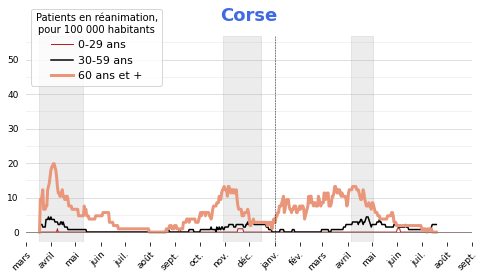

In [17]:
# gf.simple_figure(d, 'Guyane', 'taux hosp')
# gf.simple_figure(d, 'Guyane', 'taux rea')
# gf.simple_figure(d, 'Guyane', 'taux d√©c√®s')
# gf.simple_figure(d, '973', 'taux dose 1')
# gf.simple_figure(d, '973', 'taux complet')


In [19]:
# gf.simple_figure(d, '973', 'incidence hebdo')
# gf.simple_figure(d, '93', 'incidence hebdo')
# gf.simple_figure(d, '971', 'incidence hebdo')

# gf.simple_figure(d, '971', 'incidence hebdo')

In [ ]:
# gf.simple_figure(d, 'France', 'incidence hebdo')
# gf.simple_figure(d, '√éle-de-France', 'incidence hebdo')
# gf.simple_figure(d, '75', 'incidence hebdo')
